# 1 Introducción

El siguiente ejemplo combina 2 imagenes parametrisadas, en una unica foto. La combinacion se realiza colocando la mitad de cada imagen en la imagen resultado. Esta combinacion puede ser vertical como horizontal, dependiendo de un parametro que se puede cambiar. Nota: las imagenes deben ser de igual tamaño.

El objetivo es calcular el tiempo que toma esta combinacion en forma secuencial para observar la diferencia de tiempo con su contraparte paralela con GPU-CUDA.

---
# 2 Armado del ambiente
Toma la dirección web de 2 imagenes con acceso público en internet, la deja disponible al contexto de ejecución del cuaderno colab.

In [18]:
#@title ## 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique las URLs de las imagenes:
url_imagen = "https://github.com/bustamanteandres/BustamanteSOA/blob/main/HPC/cara2.jpg?raw=true" #@param {type:"string"}
url_imagen2 = "https://github.com/bustamanteandres/BustamanteSOA/blob/main/HPC/cara4.jpg?raw=true" #@param {type:"string"}
#@markdown ---

!wget {url_imagen} -O imagen.jpg
!wget {url_imagen2} -O imagen2.jpg

--2020-11-22 23:56:50--  https://github.com/bustamanteandres/BustamanteSOA/blob/main/HPC/cara2.jpg?raw=true
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bustamanteandres/BustamanteSOA/raw/main/HPC/cara2.jpg [following]
--2020-11-22 23:56:50--  https://github.com/bustamanteandres/BustamanteSOA/raw/main/HPC/cara2.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bustamanteandres/BustamanteSOA/main/HPC/cara2.jpg [following]
--2020-11-22 23:56:50--  https://raw.githubusercontent.com/bustamanteandres/BustamanteSOA/main/HPC/cara2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connecte

# 3 Desarrollo

Imagen 1: imagen.jpg -RGB- [768, 1024]
Imagen 2: imagen2.jpg -RGB- [768, 1024]
Tiempo imagen: 930.937 ms
Tiempo total: 1033.96 ms


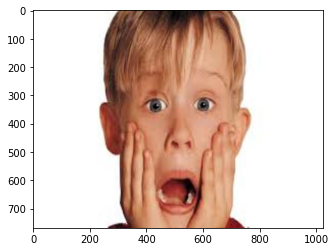

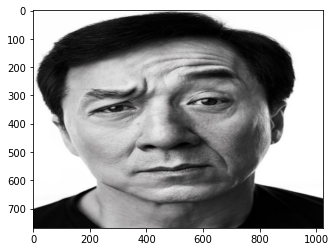

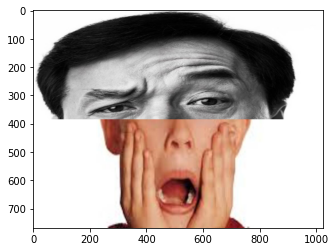

In [20]:
try:
  from datetime import datetime
  import  matplotlib.pyplot as plt
  import numpy
  from PIL import Image

  # --------------------------------------------
  # Definición de función que transforma el tiempo en  milisegundos 
  tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0

  #@markdown ---
  #@markdown ### Seleccione el modo de combinacion de imagen
  combinacion_vertical = True #@param {type:"boolean"}
  #@markdown ---

  tiempo_total = datetime.now()
  # Cargo las imagenes guardadas en el "Armado del ambiente"
  img_nombre = 'imagen.jpg'
  img2_nombre = 'imagen2.jpg'
  image = Image.open(img_nombre) 
  image2 = Image.open(img2_nombre)

  # Obtengo dimensiones de ambas imagenes
  img_alto, img_ancho = image.size
  img2_alto, img2_ancho = image2.size 

  # Muestro los atributos de las imagenes
  print("Imagen 1: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )
  print("Imagen 2: " + img2_nombre + " -" + image2.mode + "- [" + str(img2_ancho) + ", " + str(img2_alto ) + "]" )  
  if image.size != image2.size:
    raise Exception("Las imagenes no son del mismo tamaño")
  
  # Convierto las imagenes comprimidas en JPEG/PNG a array
  img1 = numpy.asarray(image)
  img2 = numpy.asarray(image2)

  # Genero el array resultado (3 pixeles usa RGB * (el tamaño del array))
  if img1.size > img2.size:
    img_result = numpy.empty_like(img1)
  else:
    img_result = numpy.empty_like(img2)

  # Muestro como se ven las imagenes antes del seudo filtro.
  plt.figure()
  imgplot = plt.imshow(img1)
  plt.figure()
  imgplot = plt.imshow(img2)

  tiempo_img = datetime.now()

  # Combino ambas imagenes en una sola
  mitad_alto = int(img_alto / 2)
  mitad_ancho = int(img_ancho / 2)
  if combinacion_vertical:
    for y in range( 0, img2_alto ):
      for x in range( 0, img2_ancho ):
        if x > mitad_ancho:
          img_result[x][y] = img1[x][y]
        else:
          img_result[x][y] = img2[x][y]
  else:
    for y  in range( 0, img2_alto ):
      for x in range( 0, img2_ancho ):
        if y > mitad_alto:
          img_result[x][y] = img1[x][y]
        else:
          img_result[x][y] = img2[x][y]

  tiempo_img = datetime.now() - tiempo_img

  # Muestro la imagen combinada
  plt.figure()
  imgplot = plt.imshow(img_result)
  tiempo_total = datetime.now() - tiempo_total
  print("Tiempo imagen:", tiempo_en_ms(tiempo_img), "ms")
  print("Tiempo total:", tiempo_en_ms(tiempo_total), "ms")
except Exception as excep:
  print("Error: ", excep)

---
# 4 Tabla de pasos de ejecución del programa


 Procesador | Funciòn | Detalle
------------|---------|----------
CPU      |  @param                | Lectura de las direcciones URL de las imagenes (jpg) a procesar.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  tiempo_en_ms          | Define una funcion para obtener el tiempo en milisegundos a partir de una fecha.
CPU      |  @param                | Lectura del modo de combinacion de imagen.
CPU      |  datetime.now()        | Toma el tiempo actual.
CPU      |  Image.open()          | Abre los archivos de las imagenes.
CPU      |  numpy.asarray(imagen) | Convierte el formato comprimido JPG a RAW.
CPU      |  numpy.empty_like(()   | Genera el array destino, que tendrá a la imagen resultado. 
CPU      |  print()               | Informa los atributos de las imagenes.
CPU      |  plt.imshow            | Muestra la imagenes originales.
CPU      |  for...for..           | Combina ambas imagenes en una
CPU      |  plt.imshow            | Muestra la imagen resultado.
CPU      |  print()          | Muestra el tiempo total y el tiempo dedicado a las imagenes


---
# 5 Conclusiones

Como conclusion podemos observar que al realizar la combinacion de las 2 imagenes en forma secuencial, el tiempo de ejecucion es proporcional al tamaño de cualquier de las 2 imagenes (ambas imagenes son iguales). Esto significa que la mayor parte del tiempo es utilizado por la combinacion, con lo que a medida que aumente el tamaño de las imagenes a combinar, irá aumentando el tiempo que necesita para combinarlas.

---
# 6 Bibliografía


[1] MARKDOWN SYNTAX Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

[2] Introducción a Python: [Página Colab](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb) 

[3] Tutorial Point Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

